# MESS.plotting.plot_simulations_hist()
A demonstration of the `MESS.plotting.plot_simulations_hist` routine, which plots histograms for sets of simulations grouped by `community_assembly_model`. Very useful for getting a sense of how your parameters impact the summary statistics.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display,SVG
from scipy.stats import entropy
import MESS
import numpy as np
import pandas as pd
import collections

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


Here we'll select only the sumstats relevant to the abundance and trait axes. Select only simulations of lambda 0.85 +/- 0.1, and do not normalize the Hill numbers.

Removed invariant targets. Retained: ['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'trait_h1', 'trait_h2', 'trait_h3', 'trait_h4', 'mean_local_traits', 'std_local_traits', 'skewness_local_traits', 'kurtosis_local_traits', 'median_local_traits', 'iqr_local_traits', 'mean_regional_traits', 'std_regional_traits', 'skewness_regional_traits', 'kurtosis_regional_traits', 'median_regional_traits', 'iqr_regional_traits', 'reg_loc_mean_trait_dif', 'reg_loc_std_trait_dif', 'reg_loc_skewness_trait_dif', 'reg_loc_kurtosis_trait_dif', 'reg_loc_median_trait_dif', 'reg_loc_iqr_trait_dif', 'abundance_trait_cor']
Nsims
  neutral	345
  filtering	354
  competition	301


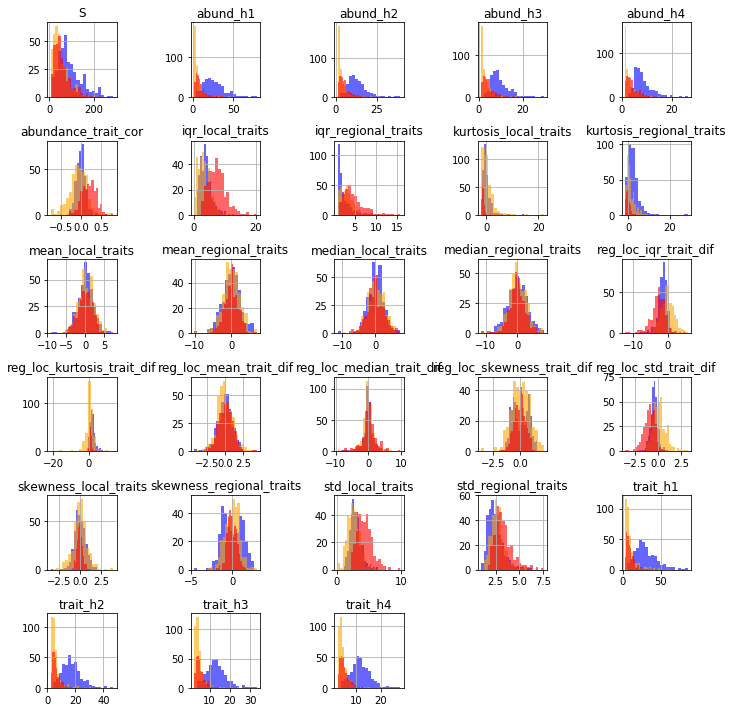

In [7]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=False,\
                                        figsize=(20, 20), select=0.85, tol=.1,\
                                        feature_set=MESS.stats.feature_sets()["abundance+trait"])


## Zoom in on a couple of the plots that are more interesting

Removed invariant targets. Retained: ['abund_h1']
Nsims
  neutral	333
  filtering	347
  competition	320


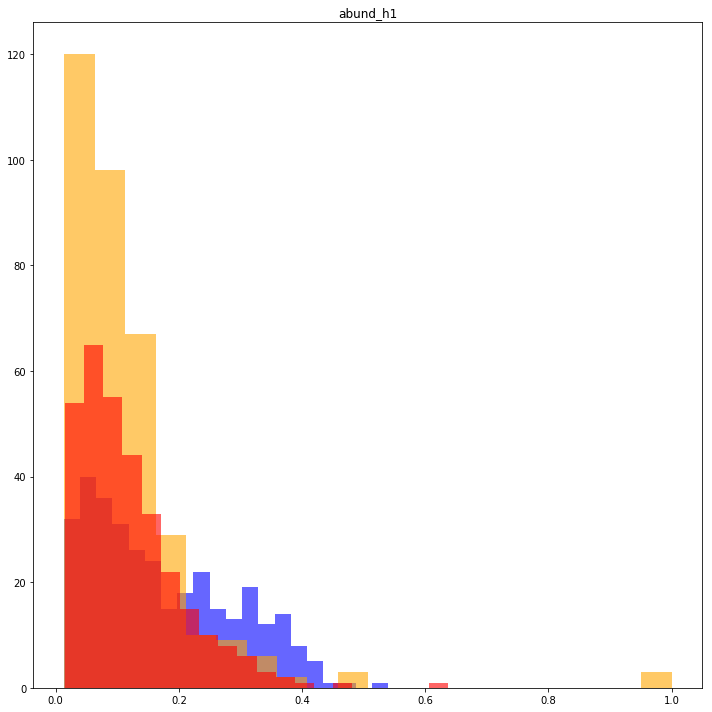

In [16]:
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=True,\
                                        feature_set=["abund_h1"])

Removed invariant targets. Retained: ['S']
Nsims
  neutral	333
  filtering	347
  competition	320


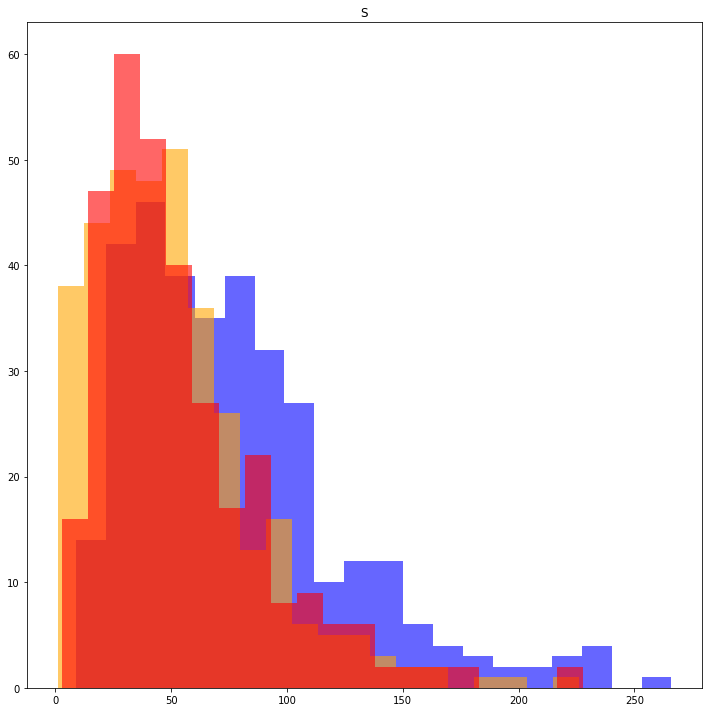

In [17]:
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=True,\
                                        feature_set=["S"])

Removed invariant targets. Retained: ['generation']
Nsims
  neutral	333
  filtering	347
  competition	320


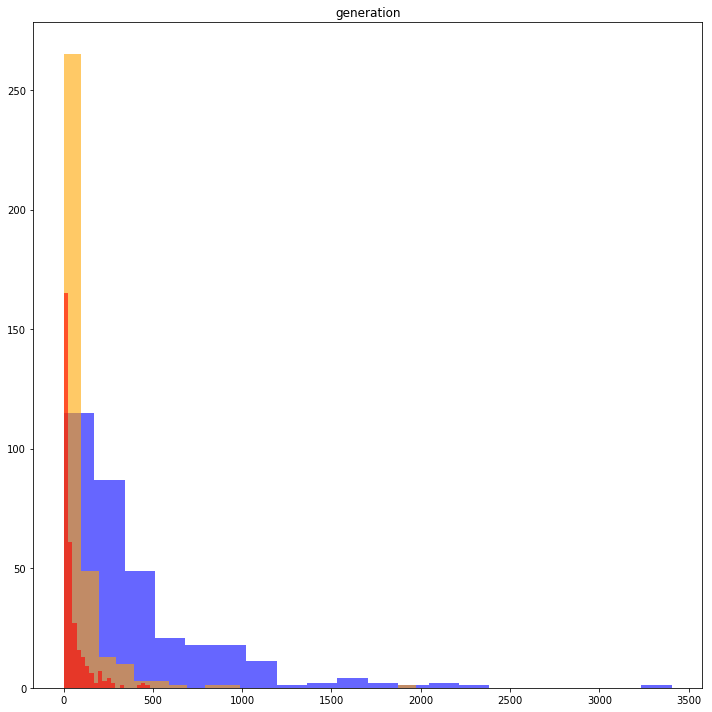

In [19]:
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=True,\
                                        feature_set=["generation"])

Removed invariant targets. Retained: ['extrate_calculated']
Nsims
  neutral	333
  filtering	347
  competition	320


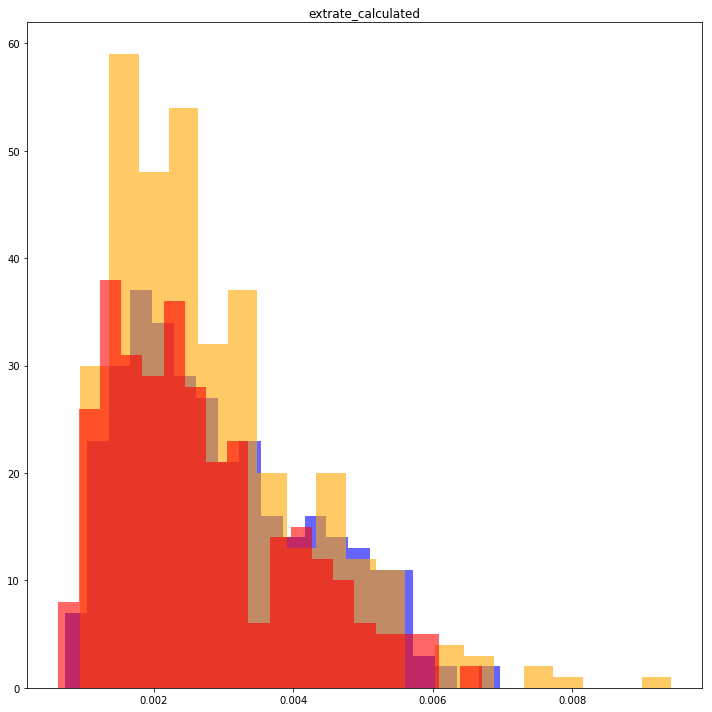

In [21]:
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=True,\
                                        feature_set=["extrate_calculated"])

Removed invariant targets. Retained: ['std_local_traits']
Nsims
  neutral	333
  filtering	347
  competition	320


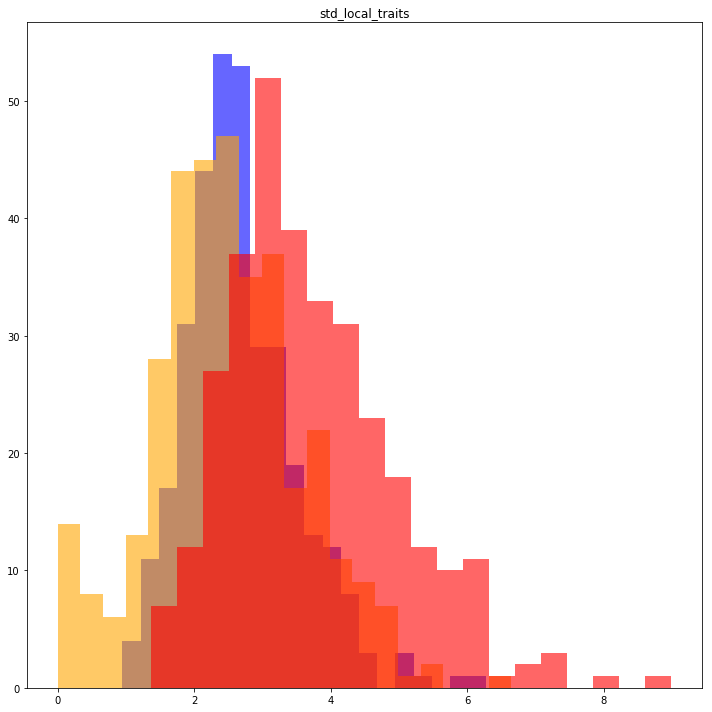

In [22]:
_ = MESS.plotting.plot_simulations_hist(simfile, verbose=True, normalize_hills=True,\
                                        feature_set=["std_local_traits"])

## Experimental
Testing plotting the bins of the SGD in a SFS style. I like it, but it _really_ confuses people.

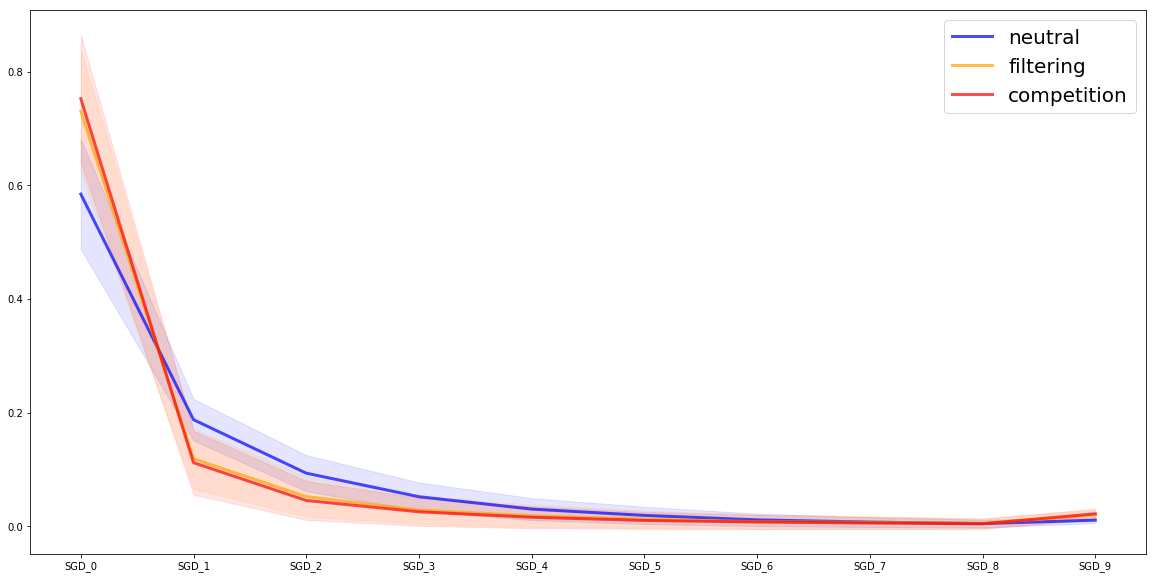

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.legend(fontsize=20)
cols = {"neutral":"blue", "filtering":"orange", "competition":"red"}
for lab, df in dfs.items():
    X = df.filter(regex="SGD*")
    X = X.div(X.sum(axis=1), axis=0)
    ax.plot(X.mean(), linewidth=3, label=lab, alpha=0.7, color=cols[lab])
    ax.fill_between(range(0, 10), X.mean()+X.std(), X.mean()-X.std(), color=cols[lab], alpha=0.1)
ax.legend(fontsize=20)

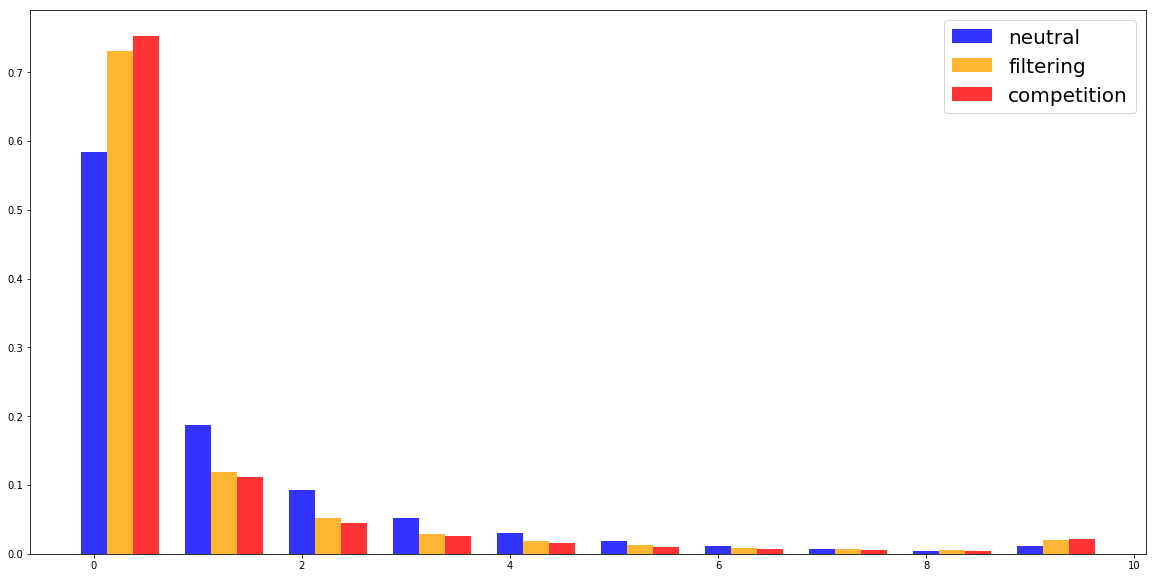

In [105]:
fig, ax = plt.subplots(figsize=(20, 10))

width=1/4.
xs = np.array(xrange(0, 10))
X = neut_df.filter(regex="SGD*")
ax.bar(xs, X.div(X.sum(axis=1), axis=0).mean(), width=width, label="neutral", color="blue", alpha=0.8)
X = filt_df.filter(regex="SGD*")
ax.bar(xs+width, filt_df.filter(regex="SGD*").div(X.sum(axis=1), axis=0).mean(), width=width, label="filtering", color="orange", alpha=0.8)
X = comp_df.filter(regex="SGD*")
ax.bar(xs+2*width, comp_df.filter(regex="SGD*").div(X.sum(axis=1), axis=0).mean(), width=width, label="competition", color="red", alpha=0.8)

#for lab, df in dfs.items():
#    X = df.filter(regex="SGD*")
#    X = X.div(X.sum(axis=1), axis=0)
#    ax.plot(X.mean(), linewidth=3, label=lab, alpha=0.7, color=cols[lab])
#    ax.fill_between(range(0, 10), X.mean()+X.std(), X.mean()-X.std(), color=cols[lab], alpha=0.1)
ax.legend(fontsize=20)